# Projeto 1 - Ciência dos Dados

Nome: Luana Mitsudo Coelho

Nome: Vinicius Laranjeira Cardoso

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import functools
import operator
import re


In [30]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Mauricio\Downloads


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [31]:
filename = 'nespresso.xlsx'

In [32]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Valor
0,@peter_eller10 nespresso,0
1,@oicronofobico eu tomo o nespresso decaf saben...,1
2,café fortaleza platinium – cápsulas compatible...,0
3,@bittersteel01 nespresso estremo,0
4,@barbaramarlene_ @mpcouto_ @olhinhos_dmel_1 ya...,0


In [33]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Valor
0,@philatticus nespresso?!,0
1,@fofinha_srta nespresso,0
2,@sneaknmeeks @ghaspermusic nespresso,0
3,@liliusko nespresso,0
4,100 cápsulas de café 100% arábica para nespres...,0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

Como nosso produto escolhemos a marca Nespresso. Consideramos, os tweets relevantes sendo aqueles que elogiam, criticam ou pedem melhorias a marca ou seus produtos. Já na categoria não relevante, usamos como referência tweets de propagandas e aqueles que não estão relacionados a marca.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [34]:
#Limpeza do Data Frame
import re 
def cleanup(text):
    punctuation = '[!-.:?;]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed

In [35]:
#Limpeza apenas do Treinamento
total_treinamento = " ".join(train.Treinamento).lower().split()

In [36]:
#Remoção dos emoji
em_split_whitespace = [substr.split() for substr in total_treinamento]
palavras_treinamento = functools.reduce(operator.concat, em_split_whitespace)

In [37]:
#Probabilidade de um tweet ser relevante ou irrelevante
prob = train.Valor.value_counts(True, sort=False)
P_I = prob[0]
P_R = prob[1]
print(P_I)
print(P_R)

0.77
0.23


In [38]:
# Convertendo treinamento em pd.Series
serie_treinamento = pd.Series(palavras_treinamento)
serie_treinamento

0        @peter_eller10
1             nespresso
2        @oicronofobico
3                    eu
4                  tomo
             ...       
5476     @marcelopuella
5477    @larroqueandres
5478                les
5479              falto
5480       nespresso...
Length: 5481, dtype: object

In [39]:
# Tabela absoluta do treinamento
tabela_treinamento_absoluta = serie_treinamento.value_counts()
tabela_treinamento_absoluta.head()

de           194
nespresso    186
a            113
e            112
o             94
dtype: int64

In [40]:
#Separação dos tweets em relevantes
filtro1 = train['Valor'] == 1
dados_R = train.loc[filtro1,:]

In [41]:
#Separação dos tweets em irrelevantes
filtro2 = train['Valor'] == 0
dados_I = train.loc[filtro2,:]

In [42]:
# Organizando a base de dados separada em relevantes e irrelevantes
palavras_R = " ".join(dados_R.Treinamento).lower().split()
palavras_I = " ".join(dados_I.Treinamento).lower().split()

In [43]:
# Tabela de frequências para palavras relevantes
tabela_R = pd.Series(palavras_R).value_counts()
tabela_R.head()

de           61
nespresso    51
a            49
e            44
que          41
dtype: int64

In [44]:
# Tabela de frequências para palavras irrelevantes
tabela_I = pd.Series(palavras_I).value_counts()
tabela_I.head()

nespresso    135
de           133
e             68
a             64
o             61
dtype: int64

In [45]:
#total de palavras relevantes
total_R = tabela_R.sum()

In [46]:
#total de palavras irrelevantes
total_I = tabela_I.sum()

In [47]:
#total de palavras sem repetição
total_palavras = len(set(palavras_R+palavras_I))

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [48]:
#Limpa os tweets e coloca em uma lista
lista_tweets_limpos = []
for index, linha in test.iterrows():
    tweet = cleanup(linha.Teste.lower()).split()
    em_split_whitespace = [substr.split() for substr in tweet]
    palavras_teste = functools.reduce(operator.concat, em_split_whitespace)
    lista_tweets_limpos.append(palavras_teste)

In [49]:
#Suavização de Laplace
i = 0
n = 0

while i < len(lista_tweets_limpos):
    prob_tweet_R = 1
    prob_tweet_I = 1
    
    for n in (lista_tweets_limpos[i]):
        if n not in tabela_R:
            prob_tweet_R *= (0+1)/(total_R+(total_palavras))
        else:
            prob_tweet_R *= (tabela_R[n]+1)/(total_R+(total_palavras))
        if n not in tabela_I:
            prob_tweet_I *= (0+1)/(total_I+(total_palavras))
        else:
            prob_tweet_I *= (tabela_I[n]+1)/(total_I+(total_palavras))
    if (prob_tweet_R*P_R) > (prob_tweet_I*P_I):
        test.loc[i, 'Classificador'] = 1
    else:
        test.loc[i, 'Classificador'] = 0
        
    i += 1

In [50]:
#Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou
tabela = pd.crosstab(test['Classificador'], test['Valor'], normalize=True)*100

In [51]:
tabela

Valor,0,1
Classificador,,
0.0,53.921569,14.215686
1.0,20.588235,11.274510


___
### Concluindo

## Comparativo qualitativo sobre os percentuais obtidos para que possa discutir a performance do seu classificador.

Baseado nas porcentagens obtidas na tabela acima, pode-se dizer que o classificador apresenta uma performance não muito satisfatória; isso ocorre devido a dificuldade de classificar os tweets entre relevante e irrelevante, e as porcentagens não serem proporcionais.

## Explique como são tratadas as mensagens com dupla negação e sarcasmo.

Como análise de mensagens com dupla negação, pode-se tomar como exemplo o tweet a seguir: “a nespresso manda umas receitas de café gelado, café já não é uma das minhas coisas favoritas, imagina gelado, eca, não gosto! umas misturas loucas, nada a ver gelo com café.”, percebe-se então que a frase havia recebido o valor 0,o mesmo inserido manualmente; para mensagens com sarcasmo, pode-se usar como referência o tweet: “pronto agora eu tenho uma nespresso, uma tv e uma alexa, só falta o resto 🤣”, onde o classificador atribuiu o valor 1, sendo o mesmo valor atribuído manualmente.

## Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?

   Levando em conta que o classificador Naive-Bayes é uma ferramenta utilizada para análise de textos com muita frequência e levando em consideração também os resultados obtidos na primeira iteração do classificador podemos afirmar que a ferramenta apresenta uma qualidade razoavelmente satisfatória de resultados.
   
   Sendo assim pode-se dizer que após futuras iterações do projeto (aumentar a base de dados utilizada para construir o classificador melhor, adicionar mais categorias de relevância, considerar relações discursivas e buscar diminuir a suposição de independência entra palavras), o classificador apresentaria resultados ainda mais otimizados, portanto se tornando mais eficiente. Desse modo a continuidade do financiamento traria ótimos benefícios para a empresa, tornando a vista do público sobre a empresa mais fácil de ser analisada e compreendida.

## Por que não posso alimentar a base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.

A base de treinamento não pode ser alimentada pelo próprio classificador pois o mesmo aprende com a classificação manual, podemos afirmar que o classificador se alimenta automaticamente na base de treinamento e a tendencia é que a precisão do classificador seria menor com relação a um classificador construído em uma base de dados classificada manualmente

## Diferentes cenários de uso para o classificador Naive-Bayes.

- Filtrar e-mails, com as classificações spam e principais.
- Filtrar propagandas entre relevantes ou irrelevantes para cada usuário do Instagram ou outra rede social.
- Filtrar sugestões de filmes ou series para cada usuário do Netflix ou outra plataforma de Streaming.


## Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar

- Acrescentar novas categorias de relevância, para que cada uma receba um limite, em probabilidade, de faixa de valor. Com isso, a porcentagem de verdadeiros positivos e falsos positivos irão aumentar.
- Acrescentar dados a base de treinamento, para isso ocorrer precisa-se aumentar o parâmetro “n” no arquivo “Projeto1-Cdados-2021.1.ipynb” e repetir a etapa de classificar todos os tweets em relevantes e irrelevantes. Isso irá melhorar a performance do classificador pois terá mais dados para basear-se em futuros tweets.


___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [52]:
#Juntando as DataFrames
d = {}
d['Tweets'] = list(train['Treinamento'])+list(test['Teste'])
d['Valor'] = list(train['Valor'])+list(test['Valor'])

In [53]:
dados = pd.DataFrame(data=d)

In [54]:
dados

,Tweets,Valor
0,@peter_eller10 nespresso,0
1,@oicronofobico eu tomo o nespresso decaf saben...,1
2,café fortaleza platinium – cápsulas compatible...,0
3,@bittersteel01 nespresso estremo,0
4,@barbaramarlene_ @mpcouto_ @olhinhos_dmel_1 ya...,0
...,...,...
499,"depois q vc bebe uma cerveja boa, fica difícil...",0
500,"depois de um nespresso, fica difícil beber caf...",1
501,"@fnms80 bom dia, silva! o negócio é que ningué...",0
502,alô me @nespresso_br me doa umas capsulas ai 😢😢,0


In [55]:
#Limpeza do Data Frame
def cleanup(tweets):
    punctuation = '[!-.:?;]' 
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', tweets)
    return text_subbed

In [56]:
def classificador_completo(dados, i):
    tweets = dados.sample(frac=1, random_state=i).reset_index(drop=True)
    Treinamento1 = tweets.iloc[:300]
    Teste1 = tweets.iloc[300:]
    
    #Limpeza apenas do Treinamento
    total_treinamento1 = " ".join(Treinamento1.Tweets).lower().split()
    
    #Remoção dos emoji
    em_split_whitespace = [substr.split() for substr in total_treinamento1]
    palavras_treinamento1 = functools.reduce(operator.concat, em_split_whitespace)
    
    #Probabilidade de um tweet ser relevante ou irrelevante
    prob1 = Treinamento1.Valor.value_counts(True, sort=False)
    P_I1 = prob1[0]
    P_R1 = prob1[1]
    print(f'Probabilidade de ser irrelevante = {P_I1}')
    print(f'Probabilidade de ser relevante = {P_R1}')
    
    # Convertendo treinamento em pd.Series
    serie_treinamento1 = pd.Series(palavras_treinamento1)

    # Tabela absoluta do treinamento
    tabela_treinamento_absoluta1 = serie_treinamento1.value_counts()
    print(f'Tabela Absoluta de Treinamento1 \n {tabela_treinamento_absoluta1.head()}')
    
    #Separação dos tweets em relevantes
    filtro2 = Treinamento1['Valor'] == 1
    dados_R1 = Treinamento1.loc[filtro2,:]
    
    #Separação dos tweets em irrelevantes
    filtro3 = Treinamento1['Valor'] == 0
    dados_I1 = Treinamento1.loc[filtro3,:]
    
    # Organizando a base de dados separada em relevantes e irrelevantes
    palavras_R1 = " ".join(dados_R1.Tweets).lower().split()
    palavras_I1 = " ".join(dados_I1.Tweets).lower().split()
    
    # Tabela de frequências para palavras relevantes
    tabela_R1 = pd.Series(palavras_R1).value_counts()
    print(f'Tabela de frequência para palavras relevantes \n {tabela_R1.head()}')
    
    # Tabela de frequências para palavras irrelevantes
    tabela_I1 = pd.Series(palavras_I1).value_counts()
    print(f'Tabela de frequência para palavras irrelevantes \n {tabela_I1.head()}')
    
    #total de palavras relevantes
    total_R1 = tabela_R1.sum()
    
    #total de palavras irrelevantes
    total_I1 = tabela_I1.sum()
    
    #total de palavras sem repetição
    total_palavras1 = len(set(palavras_R1+palavras_I1))
    
    return P_R1, P_I1, tabela_R1, tabela_I1, total_R1,total_I1, total_palavras1, Treinamento1, Teste1

In [57]:
i=1
while i <= 100:
    P_R1, P_I1, tabela_R1, tabela_I1, total_R1,total_I1, total_palavras1, Treinamento1, Teste1 = classificador_completo(dados, i)
    
    #Limpa os tweets e coloca em uma lista
    lista_tweets_limpos1 = []
    for index, linha in Teste1.iterrows():
        tweet = cleanup(linha.Tweets.lower()).split()
        em_split_whitespace = [substr.split() for substr in tweet]
        palavras_teste1 = functools.reduce(operator.concat, em_split_whitespace)
        lista_tweets_limpos1.append(palavras_teste1)
        
    #Suavização de Laplace
    e = 0
    n = 0

    classificacao = []
    while e < len(lista_tweets_limpos1):
        prob_tweet_R1 = 1
        prob_tweet_I1 = 1

        for n in (lista_tweets_limpos1[e]):
            if n not in tabela_R1:
                prob_tweet_R1 *= (0+1)/(total_R1+(total_palavras1))
            else:
                prob_tweet_R1 *= (tabela_R1[n]+1)/(total_R1+(total_palavras1))
            if n not in tabela_I1:
                prob_tweet_I1 *= (0+1)/(total_I1+(total_palavras1))
            else:
                prob_tweet_I1 *= (tabela_I1[n]+1)/(total_I1+(total_palavras1))
                
        if (prob_tweet_R1*P_R1) > (prob_tweet_I1*P_I1):
            classificacao.append(1)
        else:
            classificacao.append(0)
    
        e += 1
    Teste1.loc[:,'Classificador']=classificacao
    
    #Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou
    tabela1 = pd.crosstab(Teste1['Classificador'], Teste1['Valor'], normalize=True)*100
    print(f'Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou \n {tabela1}')
    
    i += 1

Probabilidade de ser irrelevante = 0.7366666666666667
Probabilidade de ser relevante = 0.2633333333333333
Tabela Absoluta de Treinamento1 
 de           221
nespresso    177
e            128
que          106
a            104
dtype: int64
Tabela de frequência para palavras relevantes 
 de           68
nespresso    55
e            50
que          41
a            40
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           153
nespresso    122
e             78
que           65
a             64
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              60.294118   5.882353
1              19.117647  14.705882
Probabilidade de ser irrelevante = 0.75
Probabilidade de ser relevante = 0.25
Tabela Absoluta de Treinamento1 
 de           187
nespresso    179
e            112
que          102
a             95
dtype: int64
Tabela de frequência pa

Tabela Absoluta de Treinamento1 
 de           212
nespresso    179
e            126
a            114
que           90
dtype: int64
Tabela de frequência para palavras relevantes 
 de           62
nespresso    57
e            50
a            42
que          37
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           150
nespresso    122
e             76
a             72
com           60
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              50.000000   6.372549
1              28.431373  15.196078
Probabilidade de ser irrelevante = 0.7733333333333333
Probabilidade de ser relevante = 0.22666666666666666
Tabela Absoluta de Treinamento1 
 de           209
nespresso    182
e            136
que          111
a            109
dtype: int64
Tabela de frequência para palavras relevantes 
 de           52
e            48
nespresso    44
a   

Tabela Absoluta de Treinamento1 
 de           210
nespresso    183
e            115
a            100
que           92
dtype: int64
Tabela de frequência para palavras relevantes 
 de           64
e            48
nespresso    48
a            34
que          32
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           146
nespresso    135
e             67
a             66
que           60
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              52.941176  12.254902
1              22.058824  12.745098
Probabilidade de ser irrelevante = 0.7333333333333333
Probabilidade de ser relevante = 0.26666666666666666
Tabela Absoluta de Treinamento1 
 de           213
nespresso    179
e            125
a            111
que          107
dtype: int64
Tabela de frequência para palavras relevantes 
 de           60
nespresso    56
e            48
que 

Probabilidade de ser irrelevante = 0.7533333333333333
Probabilidade de ser relevante = 0.24666666666666667
Tabela Absoluta de Treinamento1 
 de           203
nespresso    174
e            109
que          105
o             97
dtype: int64
Tabela de frequência para palavras relevantes 
 de           57
nespresso    53
que          47
e            43
a            37
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           146
nespresso    121
e             66
o             62
que           58
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              51.470588   5.882353
1              25.490196  17.156863
Probabilidade de ser irrelevante = 0.7766666666666666
Probabilidade de ser relevante = 0.22333333333333333
Tabela Absoluta de Treinamento1 
 nespresso    173
de           169
e            111
a            101
que           97
dtype:

Tabela Absoluta de Treinamento1 
 de           206
nespresso    175
e            132
a            106
que          105
dtype: int64
Tabela de frequência para palavras relevantes 
 de           53
nespresso    48
a            42
e            40
que          36
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           153
nespresso    127
e             92
que           69
a             64
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              58.333333  19.607843
1              13.725490   8.333333
Probabilidade de ser irrelevante = 0.74
Probabilidade de ser relevante = 0.26
Tabela Absoluta de Treinamento1 
 de           210
nespresso    169
e            135
que          108
a             96
dtype: int64
Tabela de frequência para palavras relevantes 
 de           64
e            53
nespresso    51
que          41
a            38
d

Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              49.019608   6.372549
1              28.921569  15.686275
Probabilidade de ser irrelevante = 0.7466666666666667
Probabilidade de ser relevante = 0.25333333333333335
Tabela Absoluta de Treinamento1 
 de           219
nespresso    185
e            128
que          115
a            107
dtype: int64
Tabela de frequência para palavras relevantes 
 de           72
nespresso    58
e            47
que          42
a            42
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           147
nespresso    127
e             81
que           73
a             65
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              52.941176   8.823529
1              25.000000  13

Tabela Absoluta de Treinamento1 
 de           208
nespresso    182
e            106
que          105
a             97
dtype: int64
Tabela de frequência para palavras relevantes 
 de           60
nespresso    54
que          43
e            43
a            39
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           148
nespresso    128
e             63
que           62
a             58
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              52.450980  10.294118
1              24.509804  12.745098
Probabilidade de ser irrelevante = 0.77
Probabilidade de ser relevante = 0.23
Tabela Absoluta de Treinamento1 
 de           203
nespresso    170
e            116
que          114
a            102
dtype: int64
Tabela de frequência para palavras relevantes 
 de           50
nespresso    45
e            41
que          36
o            29
d

Probabilidade de ser irrelevante = 0.7466666666666667
Probabilidade de ser relevante = 0.25333333333333335
Tabela Absoluta de Treinamento1 
 de           199
nespresso    181
e            123
a            114
que          112
dtype: int64
Tabela de frequência para palavras relevantes 
 nespresso    56
de           52
e            49
a            44
que          44
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           147
nespresso    125
e             74
a             70
que           68
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              52.941176   8.823529
1              25.000000  13.235294
Probabilidade de ser irrelevante = 0.7666666666666667
Probabilidade de ser relevante = 0.23333333333333334
Tabela Absoluta de Treinamento1 
 de           208
nespresso    183
a            108
e            106
que          101
dtype:

Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                 0          1
Classificador                     
0              52.45098  12.745098
1              22.54902  12.254902
Probabilidade de ser irrelevante = 0.74
Probabilidade de ser relevante = 0.26
Tabela Absoluta de Treinamento1 
 de           180
nespresso    174
e            124
a            109
que          104
dtype: int64
Tabela de frequência para palavras relevantes 
 e            56
nespresso    55
de           53
a            49
que          44
dtype: int64
Tabela de frequência para palavras irrelevantes 
 de           127
nespresso    119
e             68
que           60
a             60
dtype: int64
Tabela comparativa do teste que nós classificamos com o teste que o classificador classificou 
 Valor                  0          1
Classificador                      
0              53.921569  10.784314
1              25.000000  10.294118
Probabilidade de ser irre

In [58]:
#Soma dos positivos verdadeiros com negativos verdadeiros
lista1 = []
lista1.append(tabela1[0][0]+tabela1[1][1])

Text(0, 0.5, 'positivos verdadeiros + negativos verdadeiros')

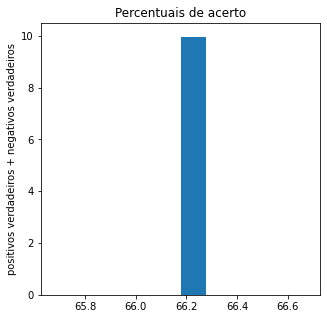

In [59]:
#Histograma dos percentuais de acerto
plt.figure(figsize=(5, 5))

plt.subplot(111)
plt.hist(lista1, edgecolor='white', density=True)
plt.title('Percentuais de acerto')
plt.ylabel('positivos verdadeiros + negativos verdadeiros')

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)


___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**

https://www.w3schools.com/python/ref_string_join.asp

https://stackoverflow.com/questions/49921720/how-to-split-emoji-from-each-other-python

https://pt.stackoverflow.com/questions/324588/fazer-um-random-de-um-dataset-com-pandas